# Strategy Testing

In [1]:
import os
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/opt/homebrew/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
class TradingStrategy:
    def __init__(self, ranking_df, stock_folder='data', lookahead_days=10, initial_capital=1000000, buy_n=5, sell_n=5, handling_fee_rate=0.0015):
        self.ranking_df = ranking_df
        self.stock_folder = stock_folder
        self.lookahead_days = lookahead_days
        self.initial_capital = initial_capital
        self.buy_n = buy_n
        self.sell_n = sell_n
        self.handling_fee_rate = handling_fee_rate
        self.stock_prices = self._load_stock_prices()

    def _load_stock_prices(self):
        stock_files = [f for f in os.listdir(self.stock_folder) if f != 'companies.csv']
        stock_data = {}
        for file in stock_files:
            stock = file.split('_')[0]
            file_path = os.path.join(self.stock_folder, file)
            df = pd.read_csv(file_path)
            df['Date'] = pd.to_datetime(df['Date'])
            df.set_index('Date', inplace=True)
            df[f'{self.lookahead_days}d Profit'] = (df['Close'].shift(-self.lookahead_days)-df['Close'])
            df[f'{self.lookahead_days}d Return rate'] = df[f'{self.lookahead_days}d Profit']/df['Close']
            df['Handling fee'] = df['Close']*self.handling_fee_rate + df['Close'].shift(-self.lookahead_days)*self.handling_fee_rate
            stock_data[stock] = df
        return stock_data

    def backtest(self):
        portfolio_value = [self.initial_capital]
        cum_return_rate = [0]

        for _, row in self.ranking_df.iterrows():
            date = row['Date']
            if date not in self.stock_prices['2330'].index:
                continue

            # Get the ranking of this date
            ranking_list = row['Ranking']

            # Determine the stocks to buy and sell
            top_stocks = ranking_list[:self.buy_n]
            bottom_stocks = ranking_list[-self.sell_n:]

            long_position_profit = sum(self.stock_prices[stock].loc[date, f'{self.lookahead_days}d Profit']-self.stock_prices[stock].loc[date, 'Handling fee'] for stock in top_stocks)
            short_position_profit = sum(-self.stock_prices[stock].loc[date, f'{self.lookahead_days}d Profit']-self.stock_prices[stock].loc[date, 'Handling fee'] for stock in bottom_stocks)

            total_profit = (long_position_profit + short_position_profit)*1000
            portfolio_value.append(portfolio_value[-1]+total_profit)

            long_position_return = sum(self.stock_prices[stock].loc[date, f'{self.lookahead_days}d Return rate']-self.handling_fee_rate*2 for stock in top_stocks)
            short_position_return = sum(-self.stock_prices[stock].loc[date, f'{self.lookahead_days}d Return rate']-self.handling_fee_rate*2 for stock in bottom_stocks)

            total_return = long_position_return+short_position_return
            cum_return_rate.append(cum_return_rate[-1]+total_return)

        return portfolio_value, cum_return_rate

## Strategy Backtesting

### CNN Hetero (Buy 5, Sell 5)

[1000000, 1005673.4116888046, 1016819.0596160889, 1255230.1662487984, 1251282.0841684341, 1457399.999862194, 1454978.156897068, 1436664.8530631065, 1435672.6786022186, 1436819.2502994537, 1455858.4042921066, 1455053.6506614685, 1463215.3991146088, 1456618.4694976807, 1452034.4957838058, 1503731.5313005447, 1540265.1040616035, 1535475.4743680954, 1519792.4453425407, 1516425.5454978943, 1527306.8959617615, 1544126.4894871712, 1538262.94369936, 1407610.8004989624, 1419427.6541275978, 1400252.0940523148, 1615454.6655731201, 1596218.6334705353, 1600885.7185821533, 1664823.0357427597, 1485471.377090931, 1763425.1948766708, 1504391.1499810219, 1485947.1339087486, 1463754.1510829926, 1440553.2874379158, 1443303.399204731, 1444243.1712412834, 1388248.8549466133, 1379789.9005389214, 1382975.0105748177, 1401419.4728822708, 1398043.1047887802, 1960280.250987053, 1982079.7045300007, 1978872.6568992138, 1971143.6728818417, 1936931.5633718967, 1897644.3506610394, 1880372.222104311, 1695629.85141778, 

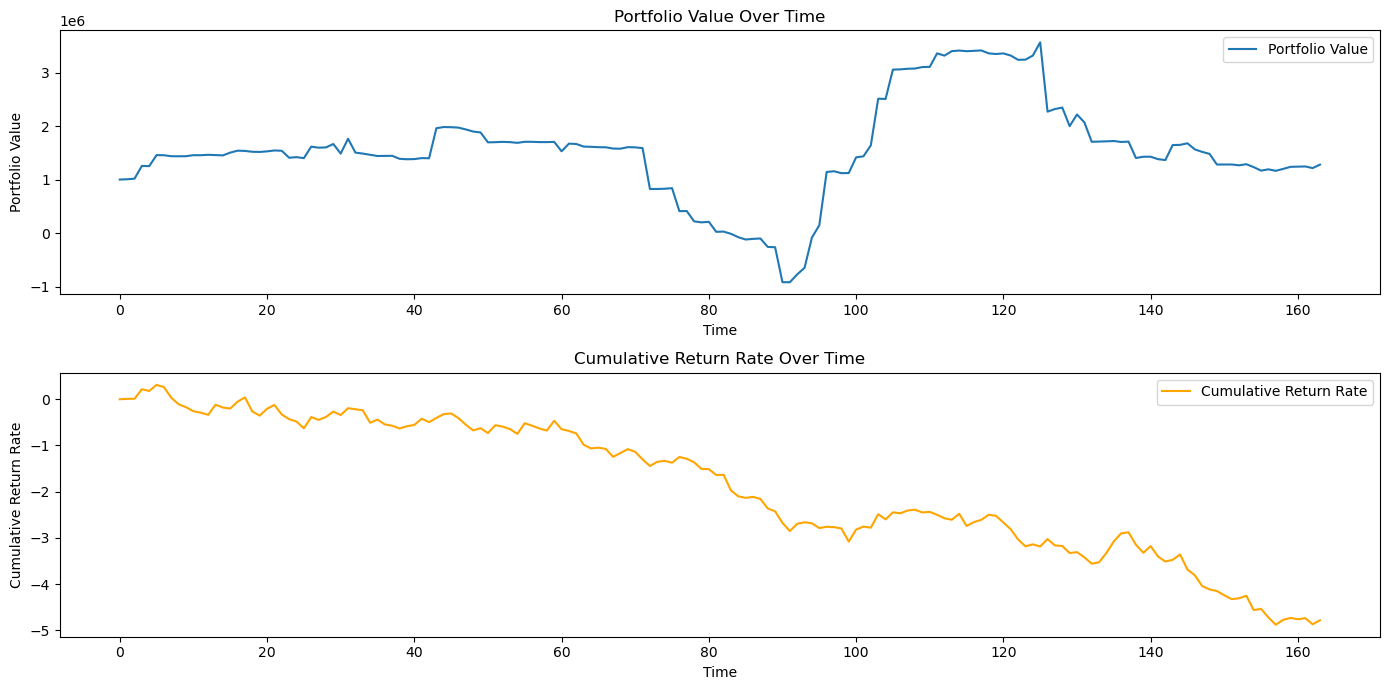

In [7]:
df = pd.read_csv('strategy_testing/CNN_Hetero_rank_training.csv')
df['Ranking'] = df['Ranking'].apply(lambda x: [str(i) for i in ast.literal_eval(x)])
strategy = TradingStrategy(df)
portfolio_value, cum_return_rate = strategy.backtest()
print(portfolio_value)
print(cum_return_rate)

# Visualize results
plt.figure(figsize=(14, 7))

# Plot portfolio value
plt.subplot(2, 1, 1)
plt.plot(portfolio_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.legend()

# Plot cumulative return rate
plt.subplot(2, 1, 2)
plt.plot(cum_return_rate, label='Cumulative Return Rate', color='orange')
plt.title('Cumulative Return Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Return Rate')
plt.legend()

plt.tight_layout()
plt.show()

### CNN Homo (Buy 5, Sell 5)

[1000000, 1014695.568672657, 1025841.2165999413, 965307.4431562424, 961541.3045296669, 1166232.584250927, 1182041.3336262703, 1173378.4049549103, 1173092.3011770248, 1174238.87287426, 1195560.5297317505, 1194755.7761011124, 1202917.5245542526, 1201805.1415977478, 1210856.2029600143, 1264953.0500369072, 1297636.0604057312, 1290646.6290483475, 1275600.2026124, 1276512.157520771, 1275989.1400151253, 1292808.733540535, 1288326.662604332, 1156556.1566944122, 1168373.0103230476, 1169870.3628482819, 1379498.4343690872, 1361827.0520453453, 1368962.8098006248, 1431184.2792191505, 1253198.2711868286, 1531152.0889725685, 1499195.3879508972, 1481381.6138606071, 1459188.631034851, 1435987.7673897743, 1440535.9290533066, 1441475.701089859, 1386878.7564973831, 1374762.2926502228, 1377970.823283434, 1386508.0320279598, 1382261.040747404, 1386726.775210619, 1410589.0014681816, 1403528.638756752, 1328027.8602175713, 1450838.9447836876, 1412506.1404881477, 1395234.0119314194, 1198077.535003662, 1195608.7

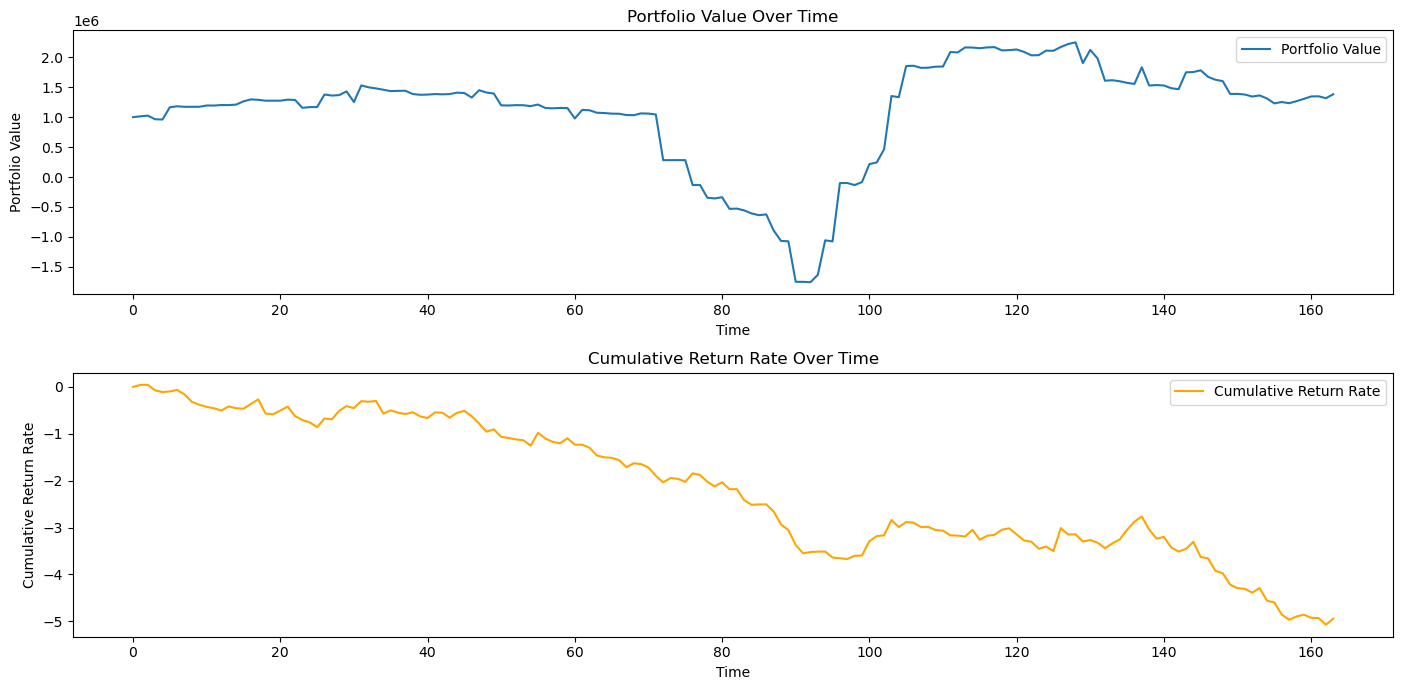

In [5]:
df = pd.read_csv('strategy_testing/CNN_Homo_rank_training.csv')
df['Ranking'] = df['Ranking'].apply(lambda x: [str(i) for i in ast.literal_eval(x)])
strategy = TradingStrategy(df)
portfolio_value, cum_return_rate = strategy.backtest()
print(portfolio_value)
print(cum_return_rate)

# Visualize results
plt.figure(figsize=(14, 7))

# Plot portfolio value
plt.subplot(2, 1, 1)
plt.plot(portfolio_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.legend()

# Plot cumulative return rate
plt.subplot(2, 1, 2)
plt.plot(cum_return_rate, label='Cumulative Return Rate', color='orange')
plt.title('Cumulative Return Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Return Rate')
plt.legend()

plt.tight_layout()
plt.show()

### CNN Total (Buy 5, Sell 5)

[1000000, 990136.4569444656, 1001282.1048717499, 967762.6655650139, 963814.5834846497, 1182517.6191205978, 1198326.3684959412, 1188976.1472334862, 1185456.5520801544, 1174879.8831591606, 1191189.5589828491, 1190774.6499242783, 1194716.1635975838, 1193750.4934577942, 1189166.5197439194, 1238826.349600792, 1262760.7519221306, 1263419.5860886574, 1248487.9436750412, 1254159.4516305923, 1253636.4341249466, 1246600.2877745628, 968422.5470919609, 841827.2820739746, 853596.8846292496, 861085.208304882, 1075372.1201767921, 1061781.733361721, 1066718.8199620247, 1124299.8795313835, 945468.4068069457, 1223422.2245926857, 1191465.5235710144, 1173651.7494807243, 1128087.6150212288, 1104886.751376152, 1106737.140982151, 1111680.6304106712, 1055491.314189434, 1045035.4270787239, 1047213.8095889091, 1065843.4289126396, 1062304.0790085793, 1632059.352238655, 1655921.5784962177, 1652326.2661674023, 1580656.2858884335, 1721304.0232708454, 1682768.6502707005, 1665496.521713972, 1481114.5453407764, 149421

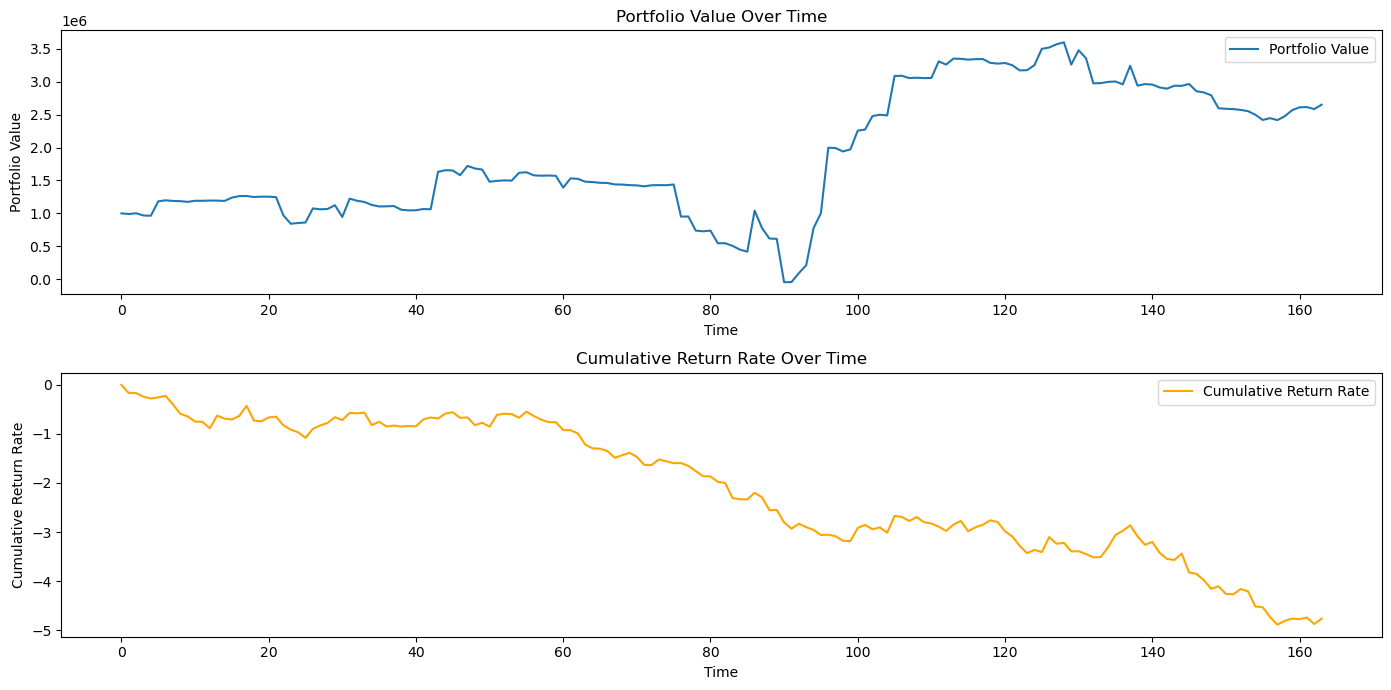

In [8]:
df = pd.read_csv('strategy_testing/CNN_Total_rank_training.csv')
df['Ranking'] = df['Ranking'].apply(lambda x: [str(i) for i in ast.literal_eval(x)])
strategy = TradingStrategy(df)
portfolio_value, cum_return_rate = strategy.backtest()
print(portfolio_value)
print(cum_return_rate)

# Visualize results
plt.figure(figsize=(14, 7))

# Plot portfolio value
plt.subplot(2, 1, 1)
plt.plot(portfolio_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.legend()

# Plot cumulative return rate
plt.subplot(2, 1, 2)
plt.plot(cum_return_rate, label='Cumulative Return Rate', color='orange')
plt.title('Cumulative Return Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Return Rate')
plt.legend()

plt.tight_layout()
plt.show()

### ResNet Hetero (Buy 5, Sell 5)

[1000000, 1012503.5735888481, 1019593.2074480057, 1034343.0668082237, 1034680.7689919472, 1049679.0188999176, 1013548.2894563675, 1025593.1600875854, 1022993.3910756111, 1008920.1916313171, 1010467.3039317131, 1013162.1317744255, 909247.5937552452, 915495.7163858414, 910664.4025235176, 963069.3452715874, 1099748.1831994057, 1084415.1187105179, 1054224.6162323952, 1079378.3452801704, 1049655.8782906532, 1050504.4161286354, 1027050.381052494, 898899.0070333481, 899842.2657027245, 880969.3623790741, 1129750.9747610092, 1087437.8025932312, 1100898.6844511032, 1088797.9737262726, 920999.3616900444, 909559.2831735611, 910769.0376400948, 881465.7672586441, 835146.5369553566, 840671.3255572319, 831978.7532835007, 916652.7497835159, 877691.2861728668, 865356.3883113861, 875819.6809232235, 903938.7885189056, 931953.3146560192, 930428.6373336315, 955196.516258955, 948804.8086321354, 926941.1754543781, 1081473.437065363, 1365727.5407226086, 1348734.9163463116, 1169161.931342125, 1360462.3790578842

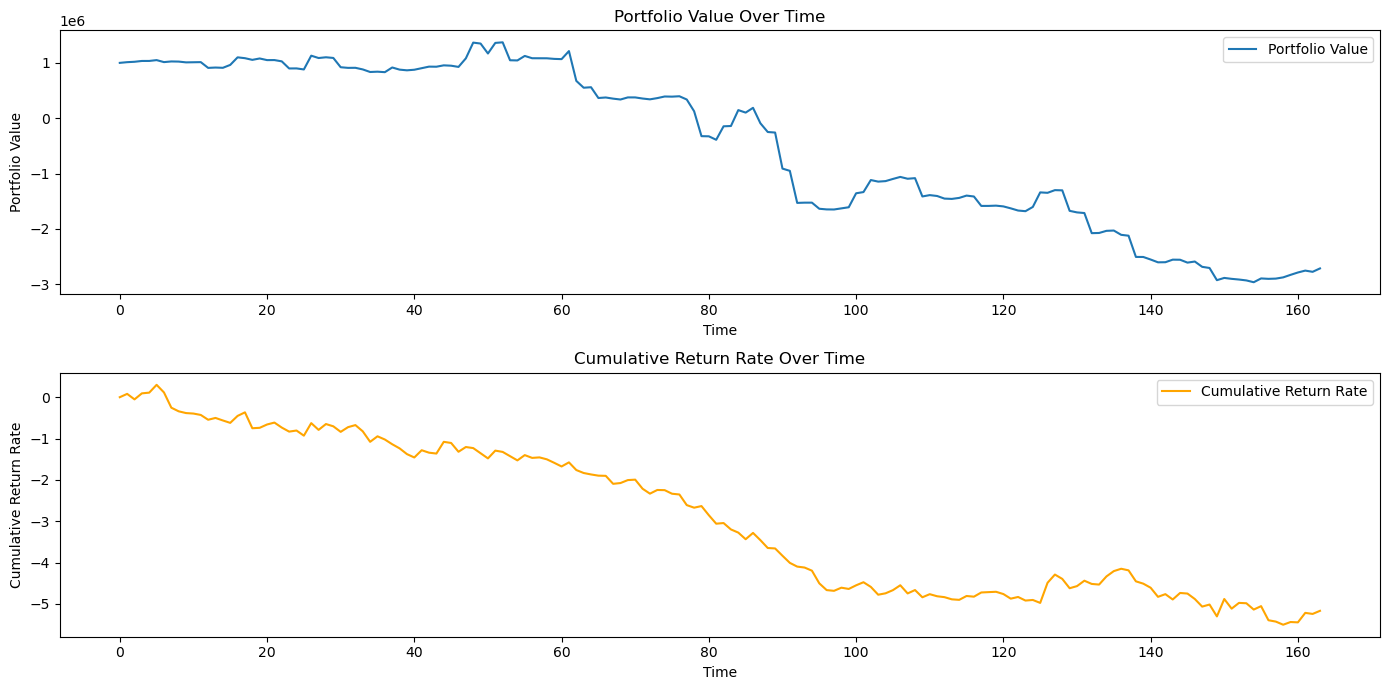

In [9]:
df = pd.read_csv('strategy_testing/ResNet_Hetero_rank_training.csv')
df['Ranking'] = df['Ranking'].apply(lambda x: [str(i) for i in ast.literal_eval(x)])
strategy = TradingStrategy(df)
portfolio_value, cum_return_rate = strategy.backtest()
print(portfolio_value)
print(cum_return_rate)

# Visualize results
plt.figure(figsize=(14, 7))

# Plot portfolio value
plt.subplot(2, 1, 1)
plt.plot(portfolio_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.legend()

# Plot cumulative return rate
plt.subplot(2, 1, 2)
plt.plot(cum_return_rate, label='Cumulative Return Rate', color='orange')
plt.title('Cumulative Return Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Return Rate')
plt.legend()

plt.tight_layout()
plt.show()

### ResNet Homo (Buy 5, Sell 5)

[1000000, 1008407.5735888481, 1023511.3046951294, 1039222.5353541374, 1034543.3141131401, 1049518.412120819, 1062367.0925498009, 1074411.9631810188, 1068801.9716935158, 1053649.8408737183, 1056443.3813476562, 926774.5140194893, 807091.726000309, 814375.6237773895, 817721.9594635963, 884829.5836992264, 1021508.4216270447, 1005858.1790342331, 979010.2113213539, 992021.5802664757, 967744.4219260216, 955813.2360191345, 934907.4789233208, 932318.307012558, 911768.857899189, 917507.5413827896, 1158007.6926708221, 1161133.7980589867, 1172938.6231102943, 1173951.129331112, 999743.4351234436, 987132.4129424095, 960357.6146321297, 923928.6565160751, 848558.7393369675, 853752.7318382263, 849206.2882883549, 937840.5581493378, 909094.2701807022, 893414.6032752991, 901527.3940770626, 926713.0363016129, 937585.53850317, 939953.0393257141, 964720.9182510376, 955279.238673687, 949247.1578145027, 910724.6653852463, 1188768.1493873596, 1199306.7907276154, 1019255.5524027348, 1014726.8997375965, 1025309.5

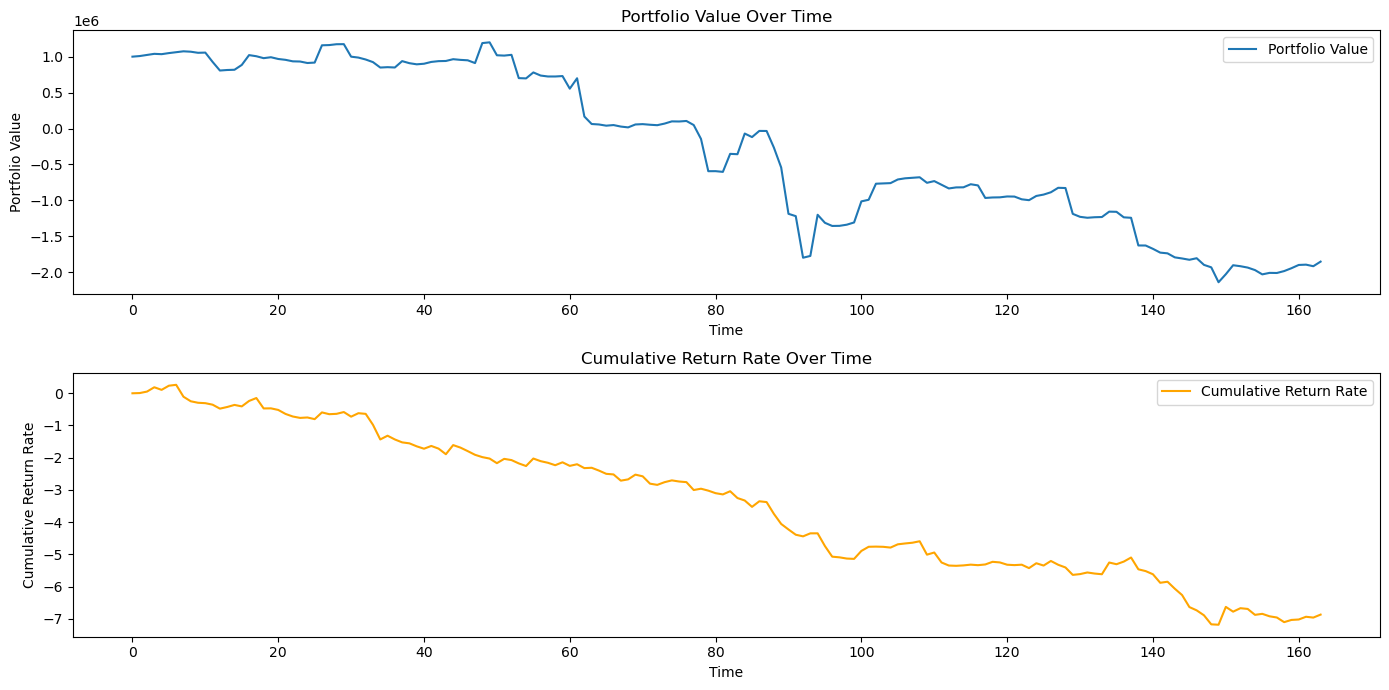

In [10]:
df = pd.read_csv('strategy_testing/ResNet_Homo_rank_training.csv')
df['Ranking'] = df['Ranking'].apply(lambda x: [str(i) for i in ast.literal_eval(x)])
strategy = TradingStrategy(df)
portfolio_value, cum_return_rate = strategy.backtest()
print(portfolio_value)
print(cum_return_rate)

# Visualize results
plt.figure(figsize=(14, 7))

# Plot portfolio value
plt.subplot(2, 1, 1)
plt.plot(portfolio_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.legend()

# Plot cumulative return rate
plt.subplot(2, 1, 2)
plt.plot(cum_return_rate, label='Cumulative Return Rate', color='orange')
plt.title('Cumulative Return Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Return Rate')
plt.legend()

plt.tight_layout()
plt.show()

### ResNet Total (Buy 5, Sell 5)

[1000000, 1007437.3880691528, 1013911.6675844193, 1005029.8344883919, 985593.2427325249, 997601.8311710358, 1011712.7228350639, 1033110.6230416298, 1029484.8869600296, 1017522.1173214912, 1017225.0860028267, 1019112.8251538277, 1011142.9356064796, 1017602.3041381836, 1020948.6398243904, 1088056.2640600204, 1226265.9603719711, 1205770.385231018, 1196675.4005064964, 1220647.9583230019, 1188939.9441170692, 1202953.53113842, 1191763.8811535835, 1072048.2460403442, 1072480.7976670265, 1073022.2602901459, 1307758.857143402, 1309457.3252987862, 1600976.225991726, 1613938.6390395164, 1436727.8048667908, 1415603.859094143, 1388829.060783863, 1354381.2010703087, 1280127.2381529808, 1285063.9598140717, 1269873.7764418125, 1265798.7305278778, 1238505.634510994, 1229625.5846452713, 1237738.3754470348, 1253544.9397935867, 1232991.5413432121, 1234618.2424368858, 1259211.3815197945, 1253493.4370384216, 1225798.487988472, 1193417.9894557, 1480834.9286165237, 1472412.0542402267, 1274780.2314674854, 1269

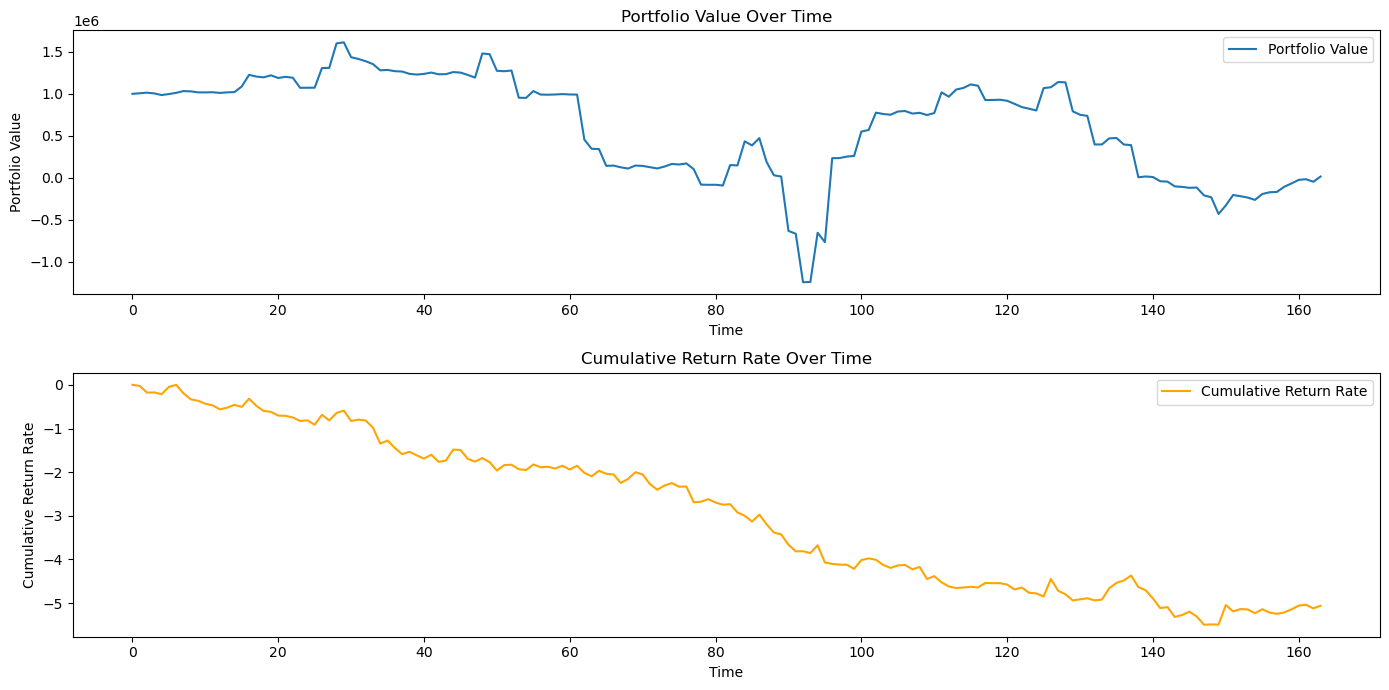

In [11]:
df = pd.read_csv('strategy_testing/ResNet_Total_rank_training.csv')
df['Ranking'] = df['Ranking'].apply(lambda x: [str(i) for i in ast.literal_eval(x)])
strategy = TradingStrategy(df)
portfolio_value, cum_return_rate = strategy.backtest()
print(portfolio_value)
print(cum_return_rate)

# Visualize results
plt.figure(figsize=(14, 7))

# Plot portfolio value
plt.subplot(2, 1, 1)
plt.plot(portfolio_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.legend()

# Plot cumulative return rate
plt.subplot(2, 1, 2)
plt.plot(cum_return_rate, label='Cumulative Return Rate', color='orange')
plt.title('Cumulative Return Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Return Rate')
plt.legend()

plt.tight_layout()
plt.show()

### UNet Hetero (Buy 5, Sell 5)

[1000000, 1004728.6770124435, 1015230.6673336029, 1027729.2813735008, 1021809.5337905884, 1227436.9494843483, 1226653.0390610695, 1206864.2515802383, 1205872.0771193504, 1194870.108710289, 1214708.7155723572, 1213903.961941719, 1218713.2220201492, 1209889.9692168236, 1217394.9985547066, 1269092.0340714455, 1301775.0444402695, 1256197.5011930466, 1241266.1011681557, 1246881.6800198555, 1258448.8315987587, 1251412.685248375, 1246930.614312172, 1116100.8960881233, 1127917.7497167587, 1137192.2764487267, 1352394.847969532, 1333978.4975395203, 1339118.0988903046, 1401230.9333133698, 1221879.274661541, 1228177.3924427032, 1192006.0233283043, 1210966.6602506638, 1165136.4528069496, 1143815.500547409, 1146999.4101166725, 1147939.182153225, 1091398.6052193642, 1082939.6508116722, 1083187.2387180328, 1091724.4474625587, 1088185.0975584984, 1660252.3021392822, 1682281.173363924, 1679175.5196092129, 1608380.6638200283, 1592045.7789280415, 1547783.8074514866, 1530511.6788947582, 1336823.4554879665,

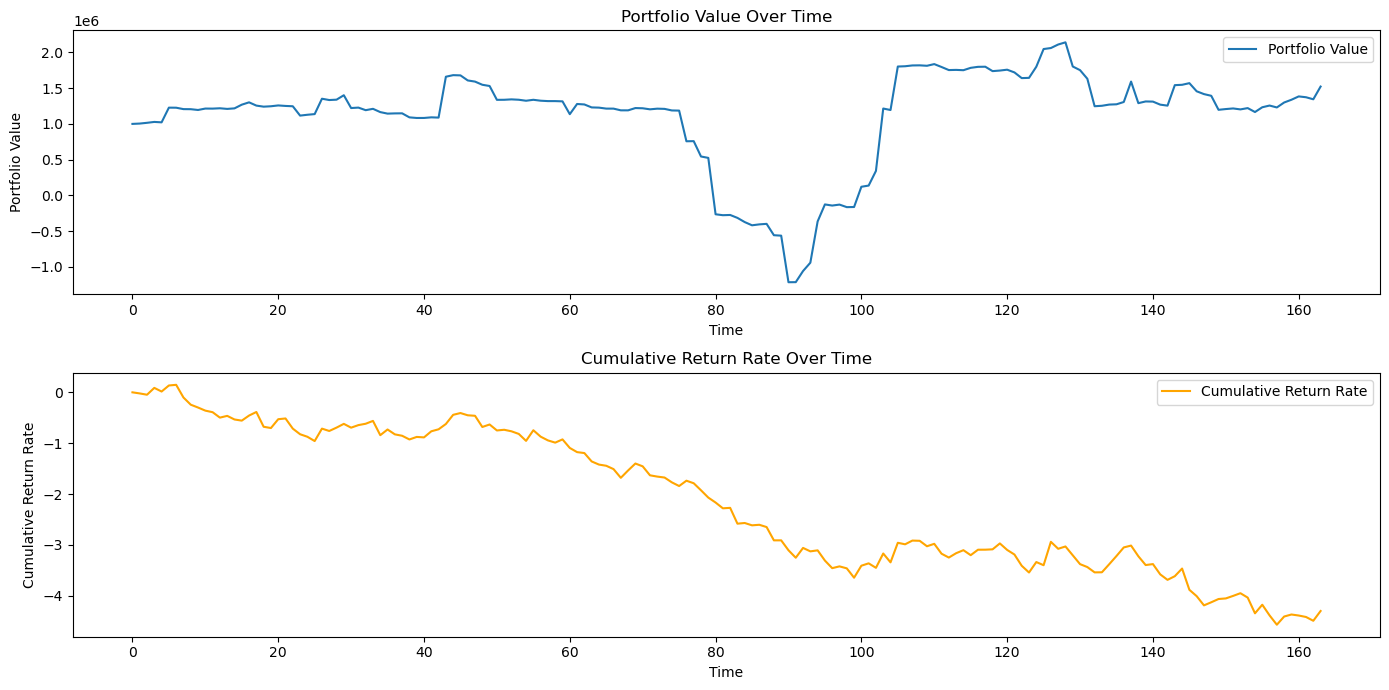

In [12]:
df = pd.read_csv('strategy_testing/UNet_Hetero_rank_training.csv')
df['Ranking'] = df['Ranking'].apply(lambda x: [str(i) for i in ast.literal_eval(x)])
strategy = TradingStrategy(df)
portfolio_value, cum_return_rate = strategy.backtest()
print(portfolio_value)
print(cum_return_rate)

# Visualize results
plt.figure(figsize=(14, 7))

# Plot portfolio value
plt.subplot(2, 1, 1)
plt.plot(portfolio_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.legend()

# Plot cumulative return rate
plt.subplot(2, 1, 2)
plt.plot(cum_return_rate, label='Cumulative Return Rate', color='orange')
plt.title('Cumulative Return Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Return Rate')
plt.legend()

plt.tight_layout()
plt.show()

### UNet Homo (Buy 5, Sell 5)

[1000000, 1011280.0072617531, 1022425.6551890373, 972673.7161817551, 969632.7439646721, 1184709.6086850166, 1200615.6236710548, 1183017.6741876602, 1182363.612607479, 1171216.6164941788, 1162874.6907253265, 1162641.6372942924, 1170803.3857474327, 1170180.8014392853, 1172183.9180049896, 1159475.3285970688, 1193644.1749219894, 1189182.711265564, 1173559.5920853615, 1179231.1000409126, 1188199.3571543694, 1187117.933177948, 1182587.477142334, 1056394.5820379257, 1066739.538869381, 1075842.217124939, 1291044.7886457443, 1272282.0408511162, 1279620.3133568764, 1346290.3688502312, 1159862.7966632843, 1438153.1281962395, 1401981.7590818405, 1414998.8179593086, 1369434.683499813, 1352553.7224235535, 1353941.0733246803, 1358884.5627532005, 1302343.9858193398, 1287159.9244041443, 1290422.7313308716, 1298845.340182066, 1295219.792627573, 1859267.027090788, 1883129.2533483505, 1878877.2254624367, 1808082.369673252, 1980684.0598993301, 1937308.3617081642, 1920036.2331514359, 1912556.5249652863, 191

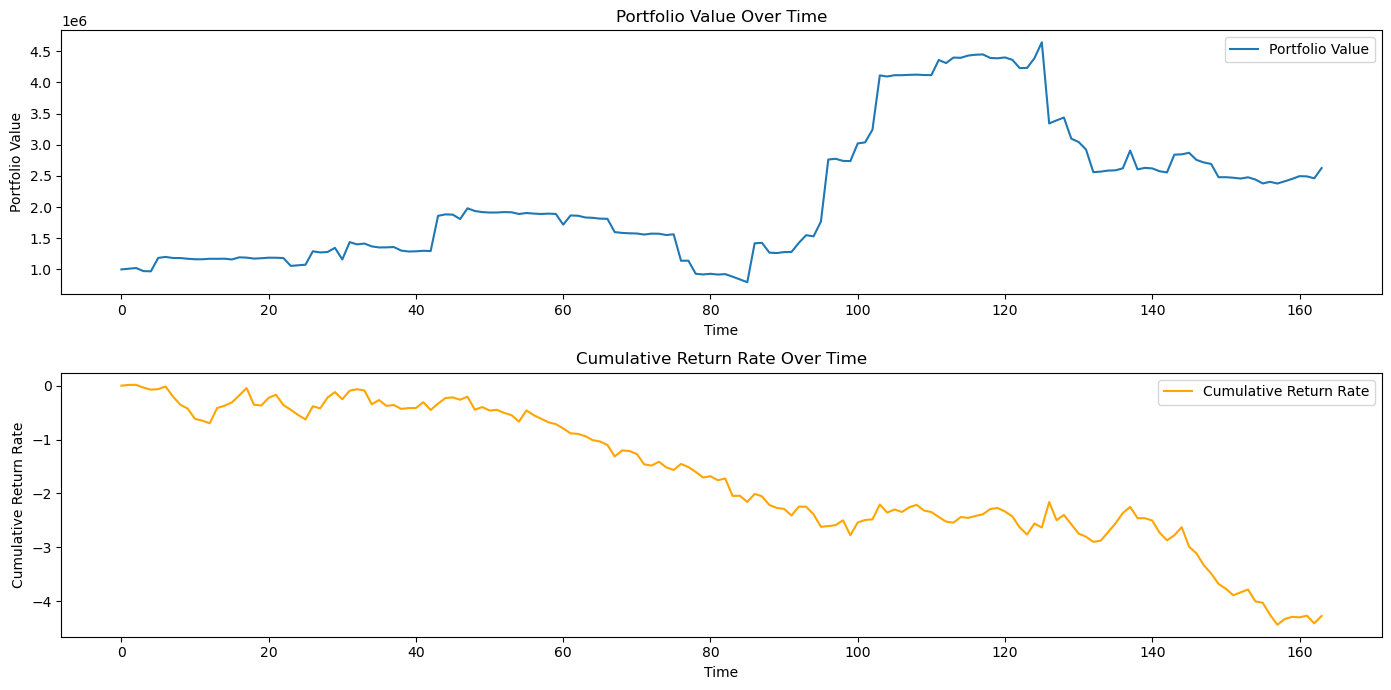

In [13]:
df = pd.read_csv('strategy_testing/UNet_Homo_rank_training.csv')
df['Ranking'] = df['Ranking'].apply(lambda x: [str(i) for i in ast.literal_eval(x)])
strategy = TradingStrategy(df)
portfolio_value, cum_return_rate = strategy.backtest()
print(portfolio_value)
print(cum_return_rate)

# Visualize results
plt.figure(figsize=(14, 7))

# Plot portfolio value
plt.subplot(2, 1, 1)
plt.plot(portfolio_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.legend()

# Plot cumulative return rate
plt.subplot(2, 1, 2)
plt.plot(cum_return_rate, label='Cumulative Return Rate', color='orange')
plt.title('Cumulative Return Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Return Rate')
plt.legend()

plt.tight_layout()
plt.show()

### UNet Total (Buy 5, Sell 5)

[1000000, 1002108.3745360374, 1013254.0224633217, 1007697.5423164368, 1005452.7777218819, 1210144.057443142, 1226117.1800932884, 1208519.2306098938, 1207865.1690297127, 1196699.6583051682, 1216179.038711071, 1215945.985280037, 1224107.7337331772, 1216428.963534832, 946281.6875309944, 997978.7230477333, 1028606.0434751511, 980022.5476870537, 964399.4285068512, 962307.1081047058, 965863.4459934235, 982624.7629065514, 690790.8068790436, 554751.512155056, 566568.3657836914, 575671.0440392494, 790873.6155600548, 773139.4460024834, 780005.2022690773, 842226.671687603, 671102.4104928969, 681321.4893336295, 649364.7883119582, 667860.0045051574, 622295.8700456618, 600974.9177861213, 604158.8273553847, 609102.3167839049, 552561.7398500441, 538133.1266493796, 541395.9335761069, 549838.0774767398, 545341.7877433299, 1109389.0222065449, 1133251.2484641075, 1127844.225476265, 1057049.3696870804, 1197737.6788711548, 1160009.2035636902, 1142737.0750069618, 956880.6503634453, 960463.2031793594, 967372.

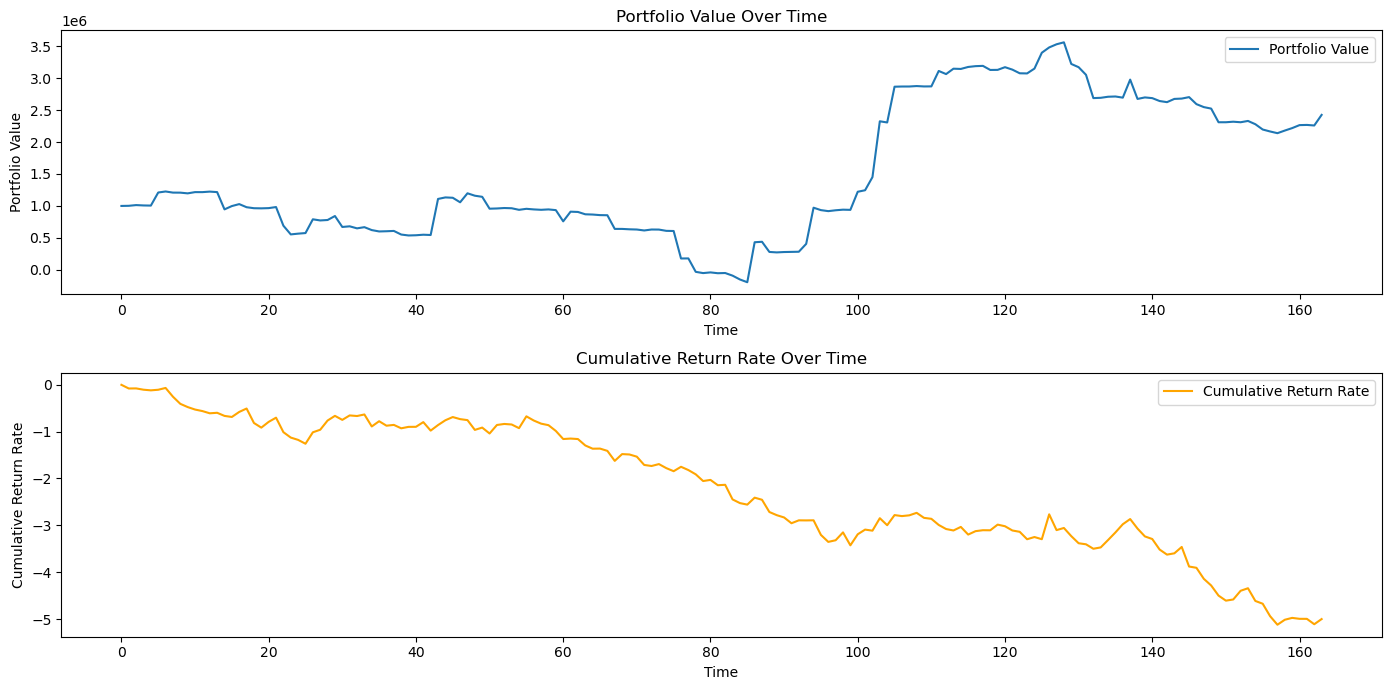

In [14]:
df = pd.read_csv('strategy_testing/UNet_Total_rank_training.csv')
df['Ranking'] = df['Ranking'].apply(lambda x: [str(i) for i in ast.literal_eval(x)])
strategy = TradingStrategy(df)
portfolio_value, cum_return_rate = strategy.backtest()
print(portfolio_value)
print(cum_return_rate)

# Visualize results
plt.figure(figsize=(14, 7))

# Plot portfolio value
plt.subplot(2, 1, 1)
plt.plot(portfolio_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.legend()

# Plot cumulative return rate
plt.subplot(2, 1, 2)
plt.plot(cum_return_rate, label='Cumulative Return Rate', color='orange')
plt.title('Cumulative Return Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Return Rate')
plt.legend()

plt.tight_layout()
plt.show()

### VGGNet Hetero (Buy 5, Sell 5)

[1000000, 1005359.8980345726, 1015861.888355732, 981474.642578125, 956959.1801848412, 1161650.4599061012, 1178444.986978054, 1165859.2371063232, 1162339.6419529915, 1152012.3394150734, 1171850.9462771416, 1171046.1926465034, 1179207.9410996437, 1173784.149755001, 1169200.1760411263, 1220897.2115578651, 1253580.2219266891, 1200807.1823892593, 1185184.0632090569, 1174781.6246299744, 1183741.8033676147, 1200503.1202807426, 1199078.1350345612, 1063038.8403105736, 1073787.6424736977, 1062526.8052072525, 1276813.7170791626, 1258397.3666491508, 1263536.9679999352, 1325936.7039465904, 1146585.0452947617, 1155186.1115546227, 1123229.4105329514, 1104785.394460678, 1058955.187016964, 1037634.2347574234, 1039021.5856585503, 1039961.3576951027, 983967.0414004326, 973855.1341171265, 977210.2643389702, 986398.1832866669, 983391.9333810806, 1545752.8879618645, 1567668.9399812222, 1565804.0688245296, 1557914.9384162426, 1545034.018288374, 1505746.8055775166, 1488474.6770207882, 1302618.2523772717, 1303

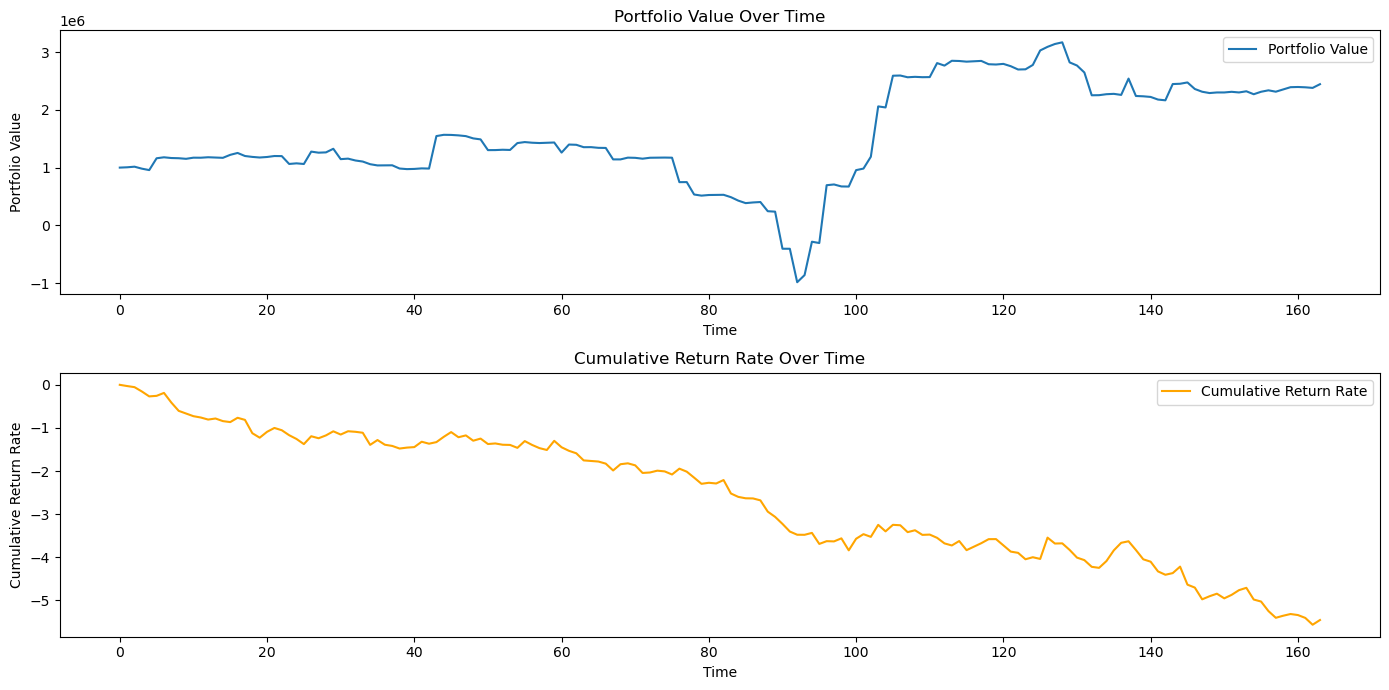

In [15]:
df = pd.read_csv('strategy_testing/VGGNet_Hetero_rank_training.csv')
df['Ranking'] = df['Ranking'].apply(lambda x: [str(i) for i in ast.literal_eval(x)])
strategy = TradingStrategy(df)
portfolio_value, cum_return_rate = strategy.backtest()
print(portfolio_value)
print(cum_return_rate)

# Visualize results
plt.figure(figsize=(14, 7))

# Plot portfolio value
plt.subplot(2, 1, 1)
plt.plot(portfolio_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.legend()

# Plot cumulative return rate
plt.subplot(2, 1, 2)
plt.plot(cum_return_rate, label='Cumulative Return Rate', color='orange')
plt.title('Cumulative Return Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Return Rate')
plt.legend()

plt.tight_layout()
plt.show()

### VGGNet Homo (Buy 5, Sell 5)

[1000000, 1002375.2124733925, 1014056.1674146652, 1039115.5000071526, 1017296.8695259094, 1223585.3885540962, 1241632.9610552788, 1223399.0501523018, 1219528.5741286278, 1208526.6057195663, 1227610.4152274132, 1225738.5608873367, 1209552.6949148178, 1204043.107383728, 1198917.8398447037, 1250614.8753614426, 1282178.1244602203, 1280028.7700181007, 1264982.3435821533, 1255105.2419018745, 1252635.9553427696, 1245599.8089923859, 1242538.7996997833, 1116155.4453134537, 1127277.464152813, 1136226.5666780472, 1351429.1381988525, 1332400.6610598564, 1339063.9025759697, 1405733.9580693245, 1226023.8837051392, 1503977.701490879, 1472021.0004692078, 1488134.3801283836, 1458970.3774986267, 1435769.51385355, 1438953.4234228134, 1443896.9128513336, 1387902.5965566635, 1381515.0848841667, 1384457.274968624, 1392994.48371315, 1389618.1156196594, 1393960.0417003632, 1415876.0937197208, 1409363.9123089314, 1338942.4097054005, 1306629.1310851574, 1297102.9982254505, 1279830.8696687222, 1093819.154359579,

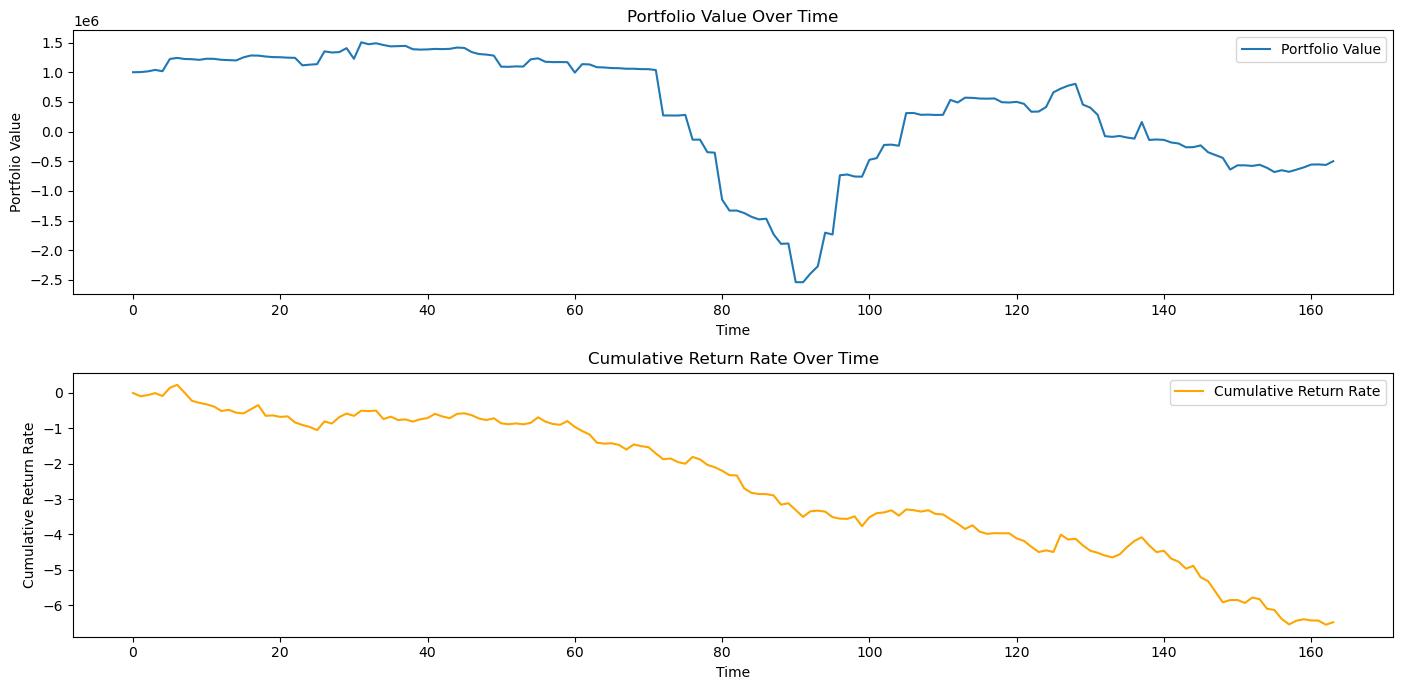

In [16]:
df = pd.read_csv('strategy_testing/VGGNet_Homo_rank_training.csv')
df['Ranking'] = df['Ranking'].apply(lambda x: [str(i) for i in ast.literal_eval(x)])
strategy = TradingStrategy(df)
portfolio_value, cum_return_rate = strategy.backtest()
print(portfolio_value)
print(cum_return_rate)

# Visualize results
plt.figure(figsize=(14, 7))

# Plot portfolio value
plt.subplot(2, 1, 1)
plt.plot(portfolio_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.legend()

# Plot cumulative return rate
plt.subplot(2, 1, 2)
plt.plot(cum_return_rate, label='Cumulative Return Rate', color='orange')
plt.title('Cumulative Return Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Return Rate')
plt.legend()

plt.tight_layout()
plt.show()

### VGGNet Total (Buy 5, Sell 5)

[1000000, 1004958.0584726334, 1015511.9745516777, 1011527.7072114944, 1008486.7349944115, 1215252.6506881714, 1230793.6948509216, 1212644.951142311, 1211990.88956213, 1213444.0038375854, 1235697.5179276466, 1234892.7642970085, 1243054.5127501488, 1234141.68764925, 1229557.7139353752, 1279217.5437922478, 1311900.5541610718, 1264607.7609138489, 1248984.6417336464, 1247422.1117596626, 1246899.0942540169, 1245790.5963754654, 1230847.5519709587, 1100195.4087705612, 1111965.0113258362, 1121067.6895813942, 1338140.2144331932, 1319907.8815836906, 1331766.4445147514, 1393987.9139332771, 1214448.6950187683, 1490547.1150517464, 1458590.414030075, 1436323.4292078018, 1414130.4463820457, 1392809.4941225052, 1395993.4036917686, 1396933.175728321, 1340392.5987944603, 1334081.8716015816, 1340092.919429779, 1348535.063330412, 1379063.9722082615, 1943111.2066714766, 1964916.6772737505, 1959509.654285908, 1882973.604866028, 1865632.8510160448, 1827904.3757085802, 1810632.247151852, 1625465.0940327647, 16

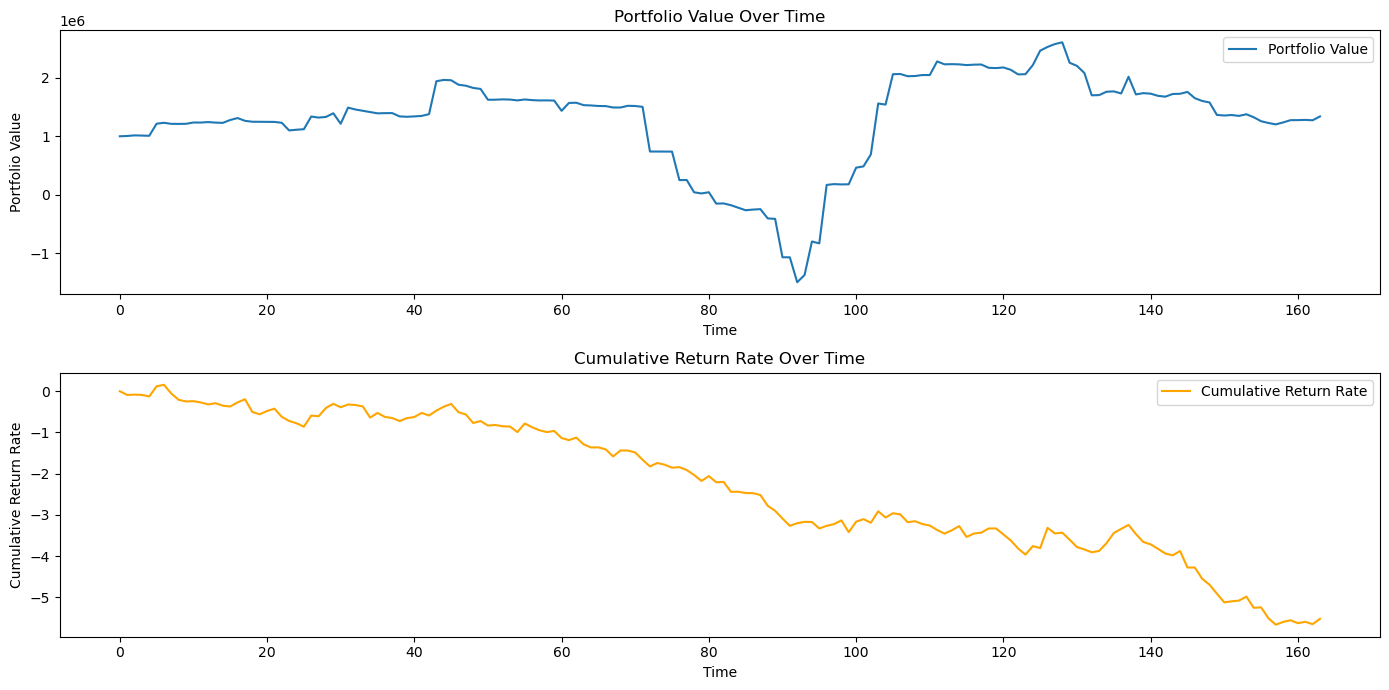

In [17]:
df = pd.read_csv('strategy_testing/VGGNet_Total_rank_training.csv')
df['Ranking'] = df['Ranking'].apply(lambda x: [str(i) for i in ast.literal_eval(x)])
strategy = TradingStrategy(df)
portfolio_value, cum_return_rate = strategy.backtest()
print(portfolio_value)
print(cum_return_rate)

# Visualize results
plt.figure(figsize=(14, 7))

# Plot portfolio value
plt.subplot(2, 1, 1)
plt.plot(portfolio_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.legend()

# Plot cumulative return rate
plt.subplot(2, 1, 2)
plt.plot(cum_return_rate, label='Cumulative Return Rate', color='orange')
plt.title('Cumulative Return Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Return Rate')
plt.legend()

plt.tight_layout()
plt.show()